In [40]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os 
import seaborn as sns
os.chdir('D:\\WORK\\Data Scientist\\RAKAMIN\\HOME CREDIT\\dataset')

In [3]:
#LOAD DATASET
app_train=pd.read_csv('application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.shape

(307511, 122)

In [5]:
app_train.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# DATA CLEANING

In [6]:
#CHECK MISSING VALUE
missing_value = pd.DataFrame(app_train.isnull().sum()/app_train.shape[0])
#Memfilter missing value yang lebih dari 50%
missing_value = missing_value[missing_value.iloc[:,0]>0.50]
missing_value.sort_values([0],ascending=False)

,0
COMMONAREA_AVG,0.698723
COMMONAREA_MEDI,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MEDI,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330
NONLIVINGAPARTMENTS_MODE,0.694330
FONDKAPREMONT_MODE,0.683862
LIVINGAPARTMENTS_MEDI,0.683550
LIVINGAPARTMENTS_AVG,0.683550
LIVINGAPARTMENTS_MODE,0.683550


In [7]:
#Drop missing value lebih dari 50%
app_train.dropna(thresh=app_train.shape[0]*0.5,axis=1,inplace=True)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Removing the 'XNA' and 'XAP' coloumn values from the coloumn 

app_train.drop(app_train[app_train.CODE_GENDER=='XNA'].index)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#descriptive statistics summary 
app_train['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

# CHECKING FOR THE IMBALANCE RATIO

In [10]:
#Have a Look into the TARGET data

app_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Here, 'Target=1' means client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample)

Anda, 'Target = 0' means client with payment no difficulties


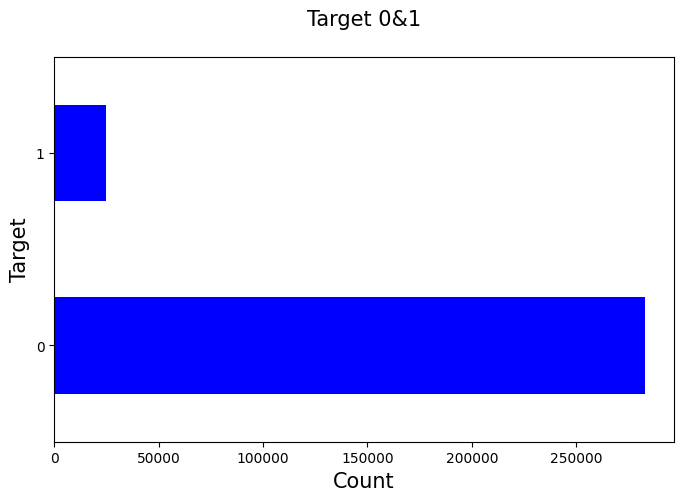

In [11]:
#Plotting for the Targets 
plt.figure(figsize=[8,5])

app_train.TARGET.value_counts().plot.barh(color='Blue')

plt.title('Target 0&1\n',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [12]:
#Checking for the imbalance ratio for the Target colomn

target_0 = app_train.loc[app_train["TARGET"]==0]
target_1 = app_train.loc[app_train["TARGET"]==1]
round(len(target_0)/len(target_1),2)

11.39

# UNIVARIATE ANALYSIS

Plotting a bar chart for those having no difficulties in re-paying the loan i.e the Target = 0 people.

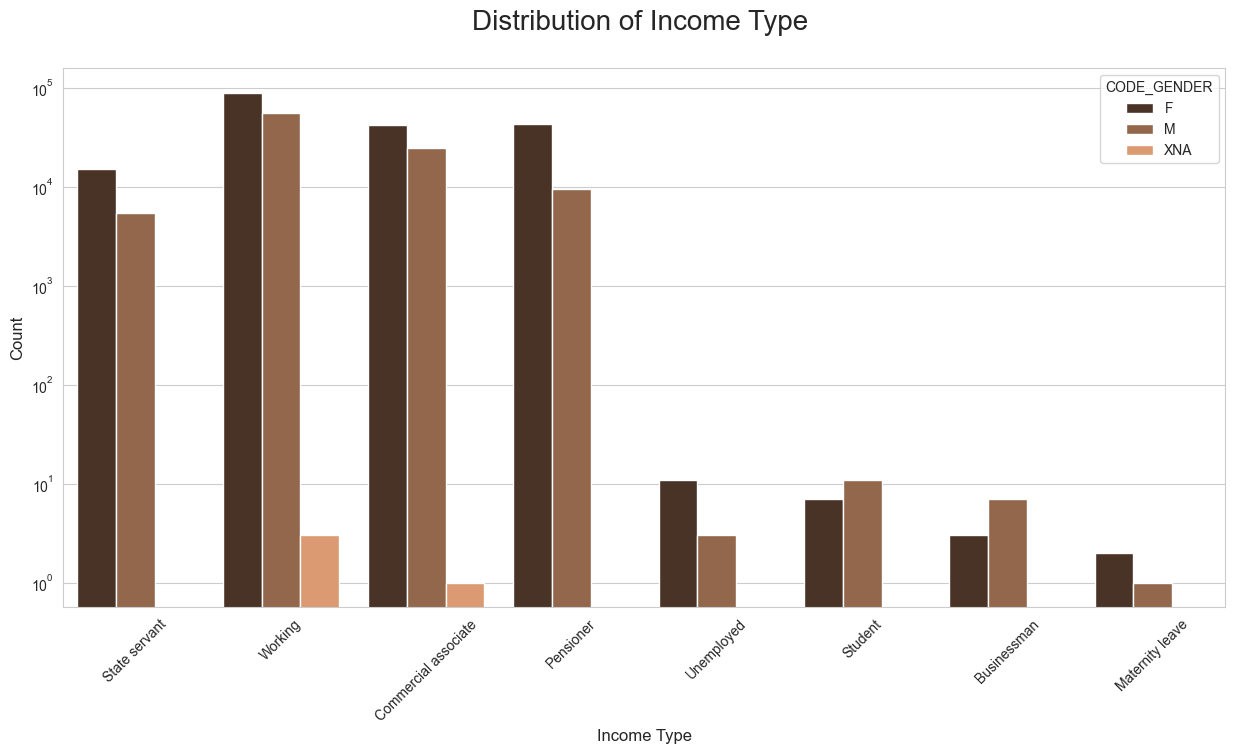

In [13]:
#Plotting for the various Income type across various Gender

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_0,x='NAME_INCOME_TYPE',hue='CODE_GENDER',palette='copper')

plt.title('Distribution of Income Type \n',fontsize=20)
plt.xlabel('Income Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

Conclusion from the graph :
1. It seems that working women have most credit than others
2. It seems that 'Working','Commercial asscoiate', and 'Pensioner' have more credit counts compared to others
3. It seems Man in 'Maternity leave' has less credit in comparison to others

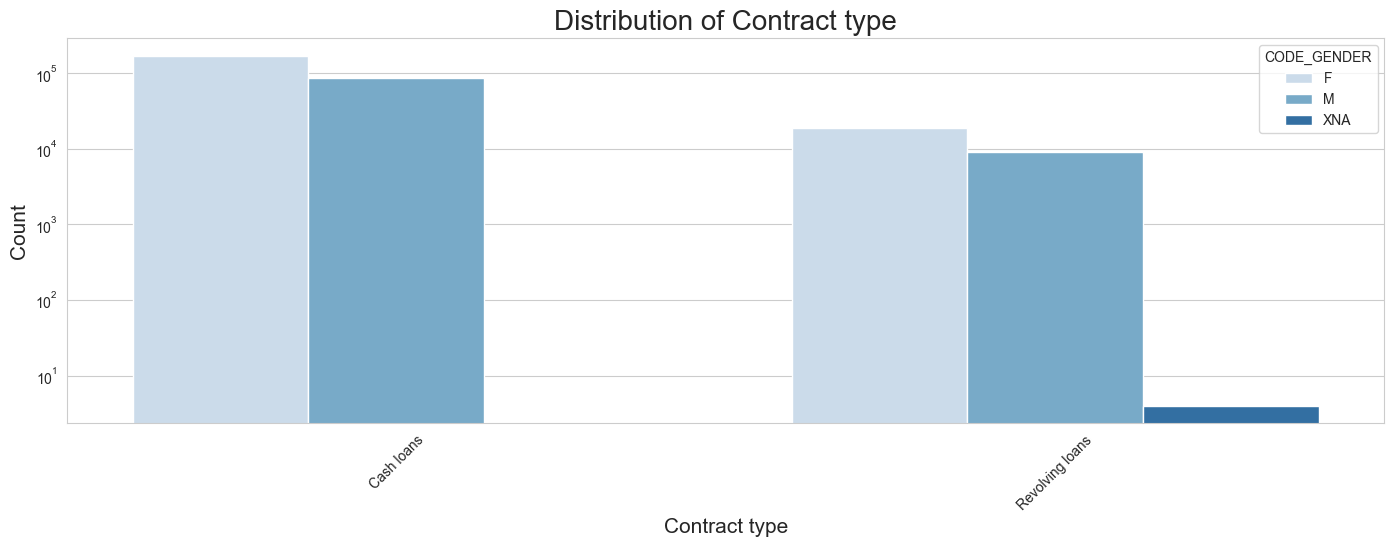

In [14]:
#Plotting for the Contract type across various Genders

plt.figure(figsize=[17,5])
sns.set_style('whitegrid')

sns.countplot(data=target_0,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',palette='Blues')

plt.title('Distribution of Contract type',fontsize=20)
plt.xlabel('Contract type',fontsize=15 )
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

Conclusion from the graph : 
1. It seems that 'Cash loans' is having higher number that 'Revolving loans' contract type
2. Also, female applies more for credit 

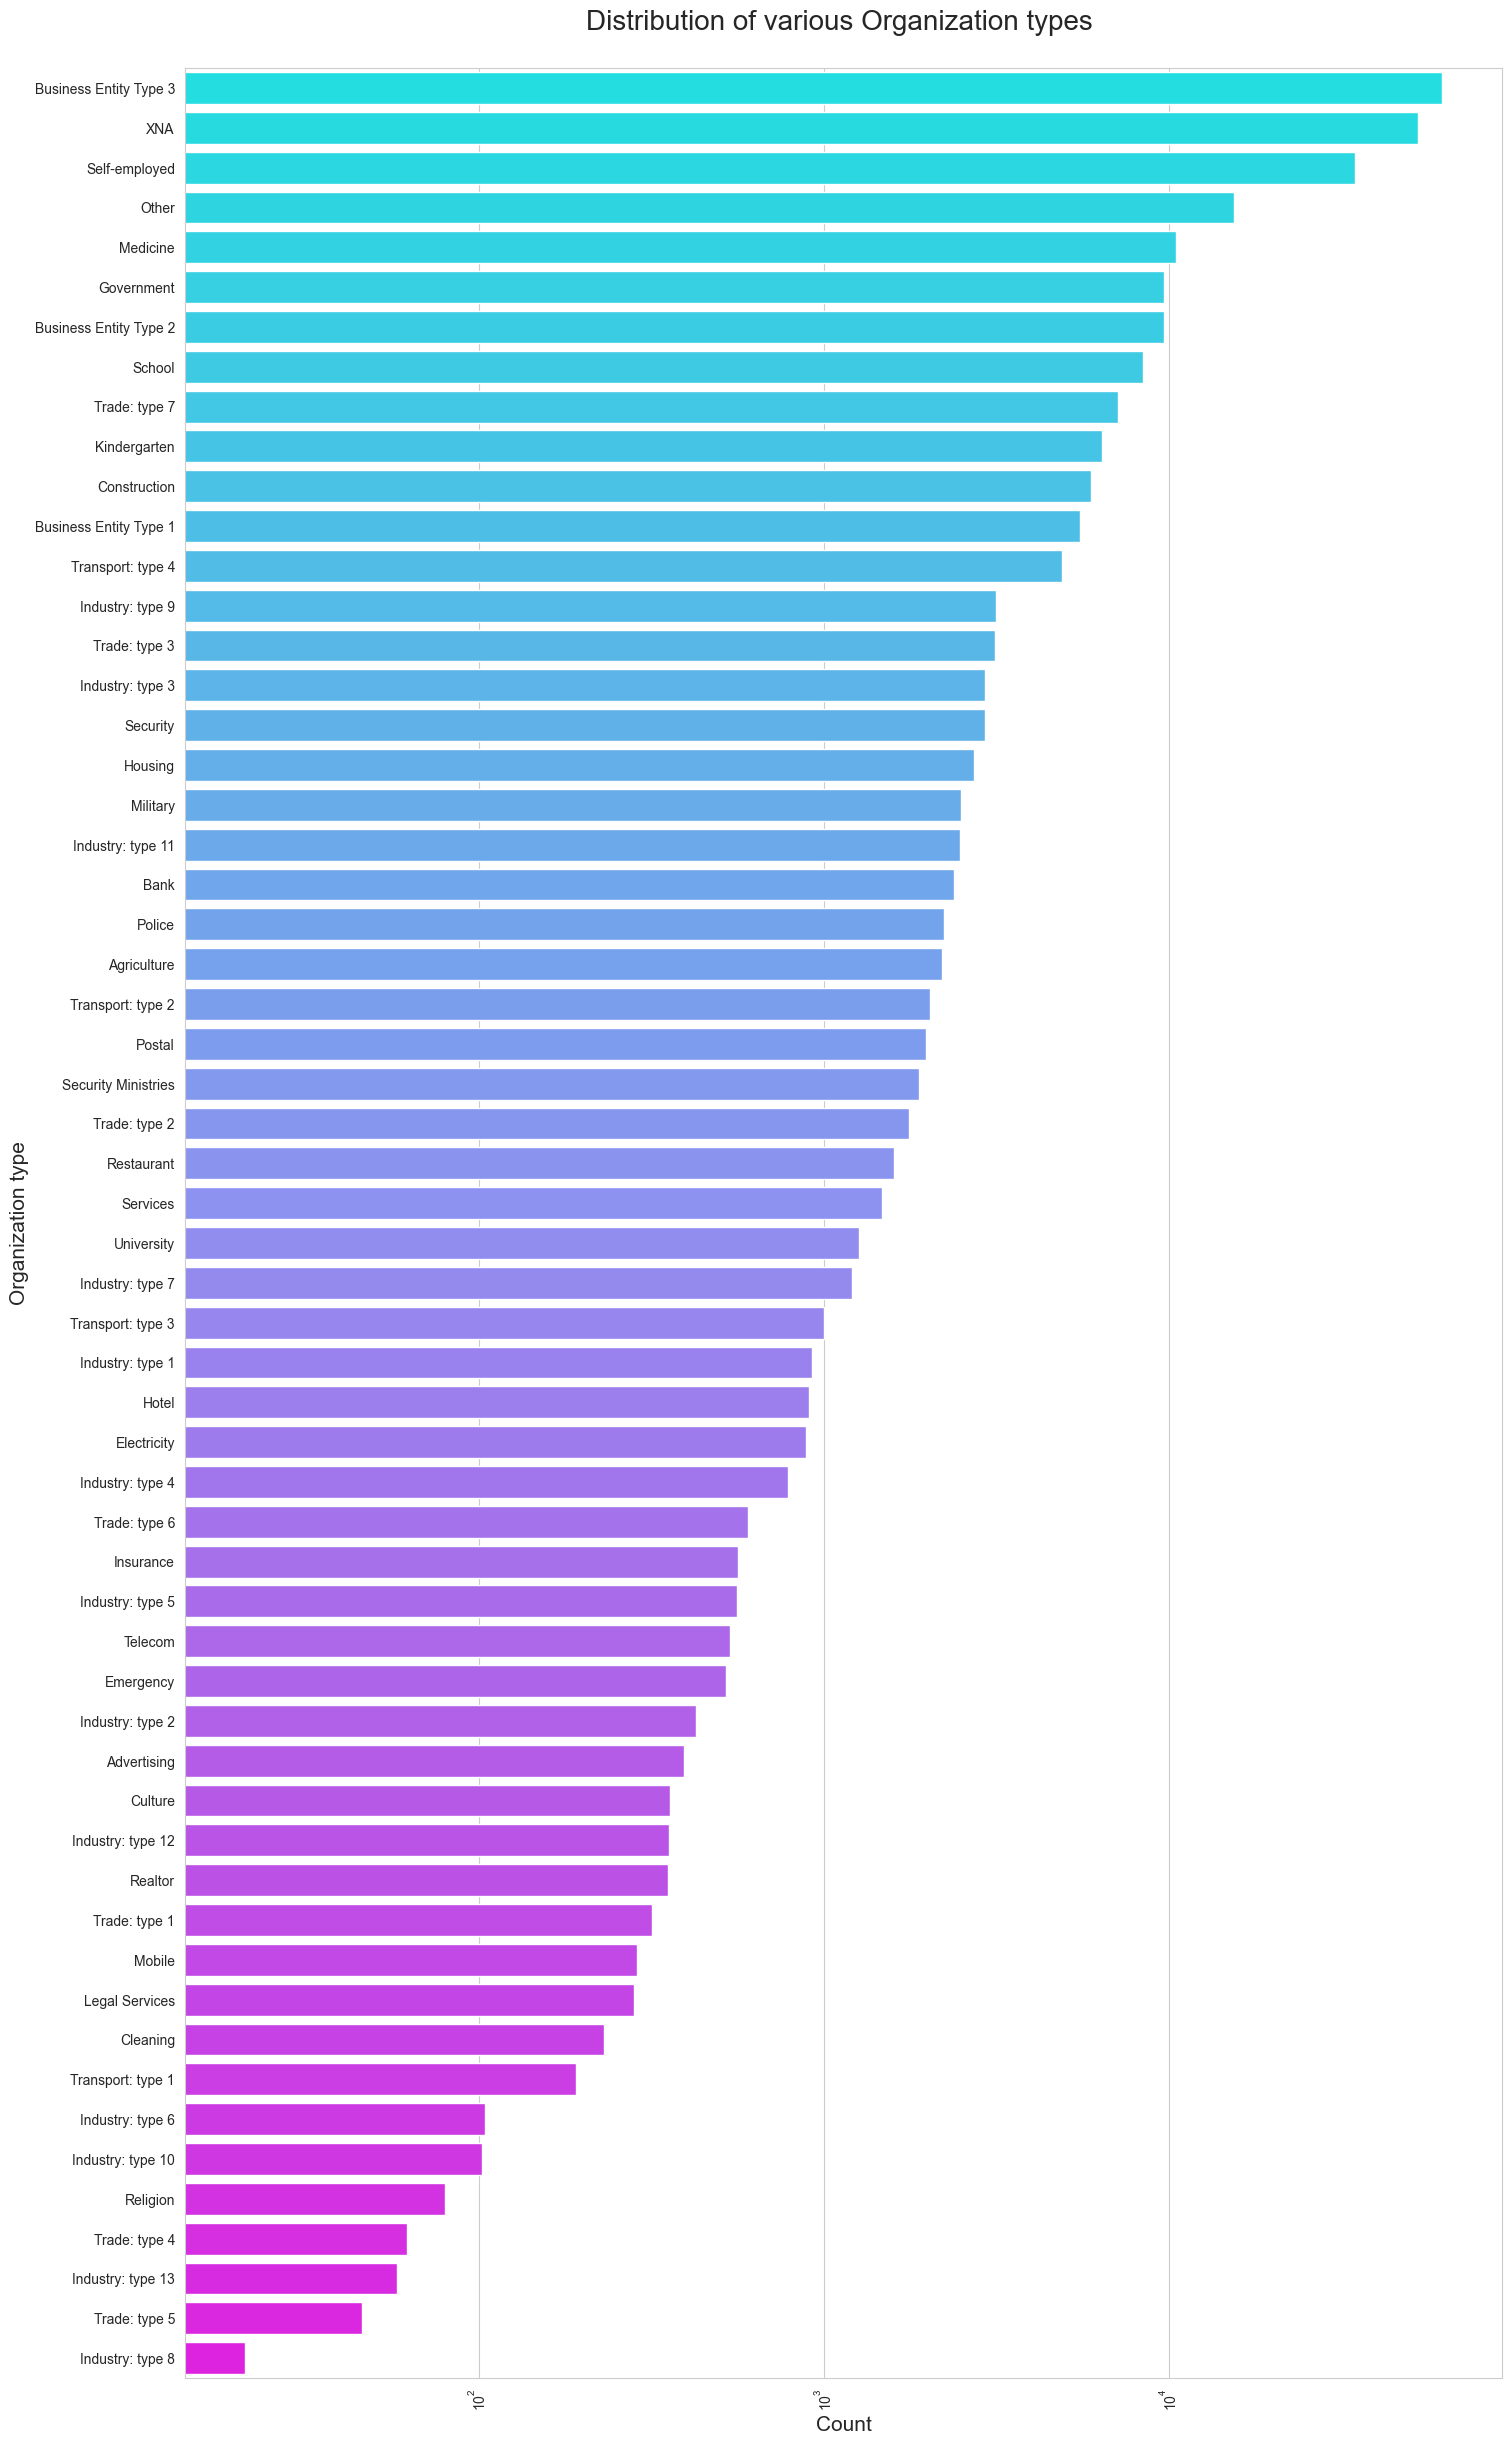

In [15]:
#Plotting for the Organization type across various Genders

plt.figure(figsize=[17,30])

sns.countplot(data=target_0,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.title('Distribution of various Organization types \n',fontsize=20)
plt.xlabel('Count',fontsize=15 )
plt.ylabel('Organization type',fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.xscale('log')

plt.show()

Conclusion from the graph :
1. Clients which have applied for credits are from most of the organization type 'Business entity Type 3', 'Self employed', 'other', 'medicine', and 'government'
2. Less clients are from industry type 8, trade type 5, industry type 13, trade type 4

Plotting a bar chart for those having difficulties in re-paying the loan i.e the Target = 1 people.

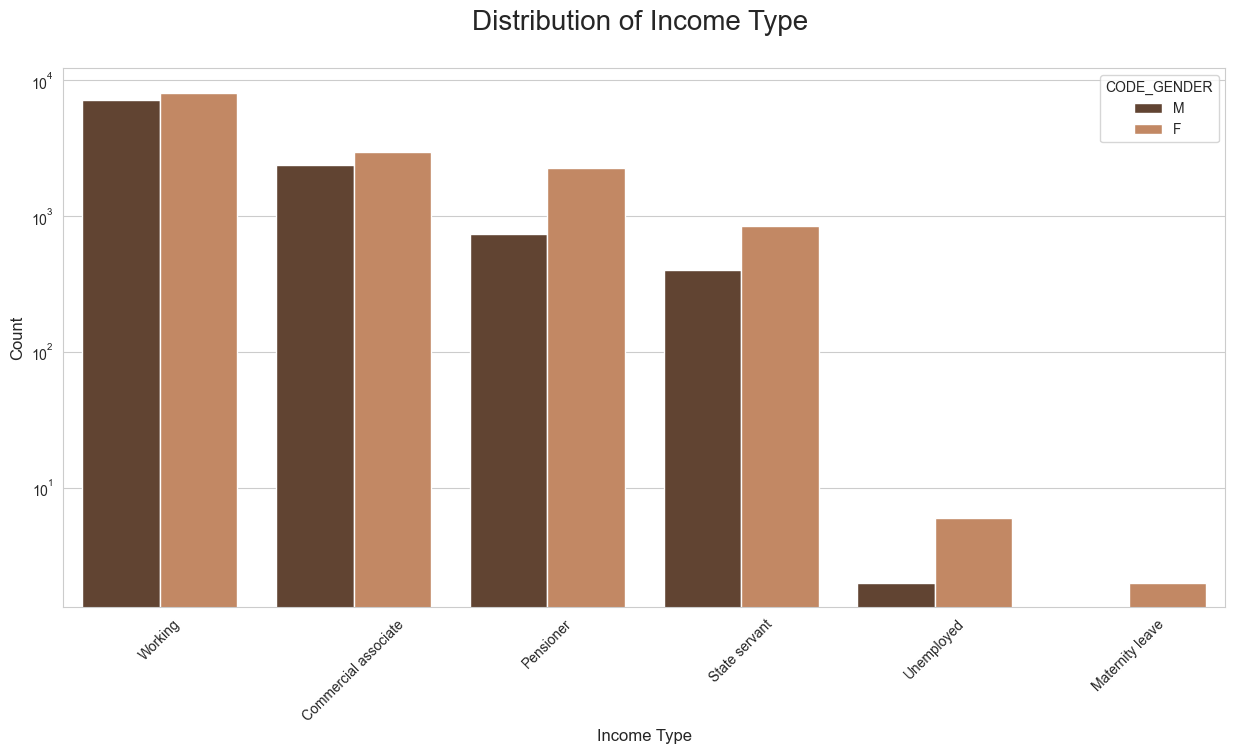

In [16]:
#Plotting for the various Income type across various Gender

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_1,x='NAME_INCOME_TYPE',hue='CODE_GENDER',palette='copper')

plt.title('Distribution of Income Type \n',fontsize=20)
plt.xlabel('Income Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

Conclusion from the graph :
1. For income type 'Working', 'Commercial associate', 'Pensioner', and 'State servant' the number of credits are higher than other i.e 'Unemployed' and 'maternity leave'
2. For the female are having more of credits than male
3. Less number of credits for income type 'Maternity leave'

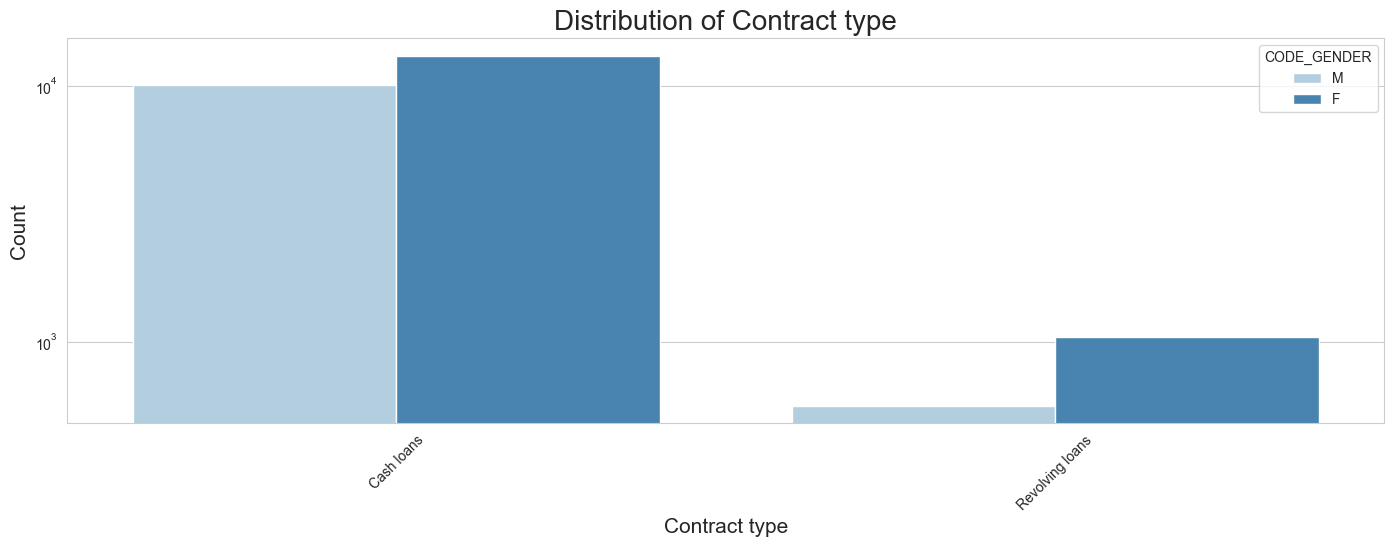

In [17]:
#Plotting for the Contract type across various Genders

plt.figure(figsize=[17,5])
sns.set_style('whitegrid')

sns.countplot(data=target_1,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',palette='Blues')

plt.title('Distribution of Contract type',fontsize=20)
plt.xlabel('Contract type',fontsize=15 )
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

Conclusions from the graph :
1. For contract type 'Cash loans' is having higher number of credits than 'Revolving loans' contract type
2. For this also female is leading for applying credits

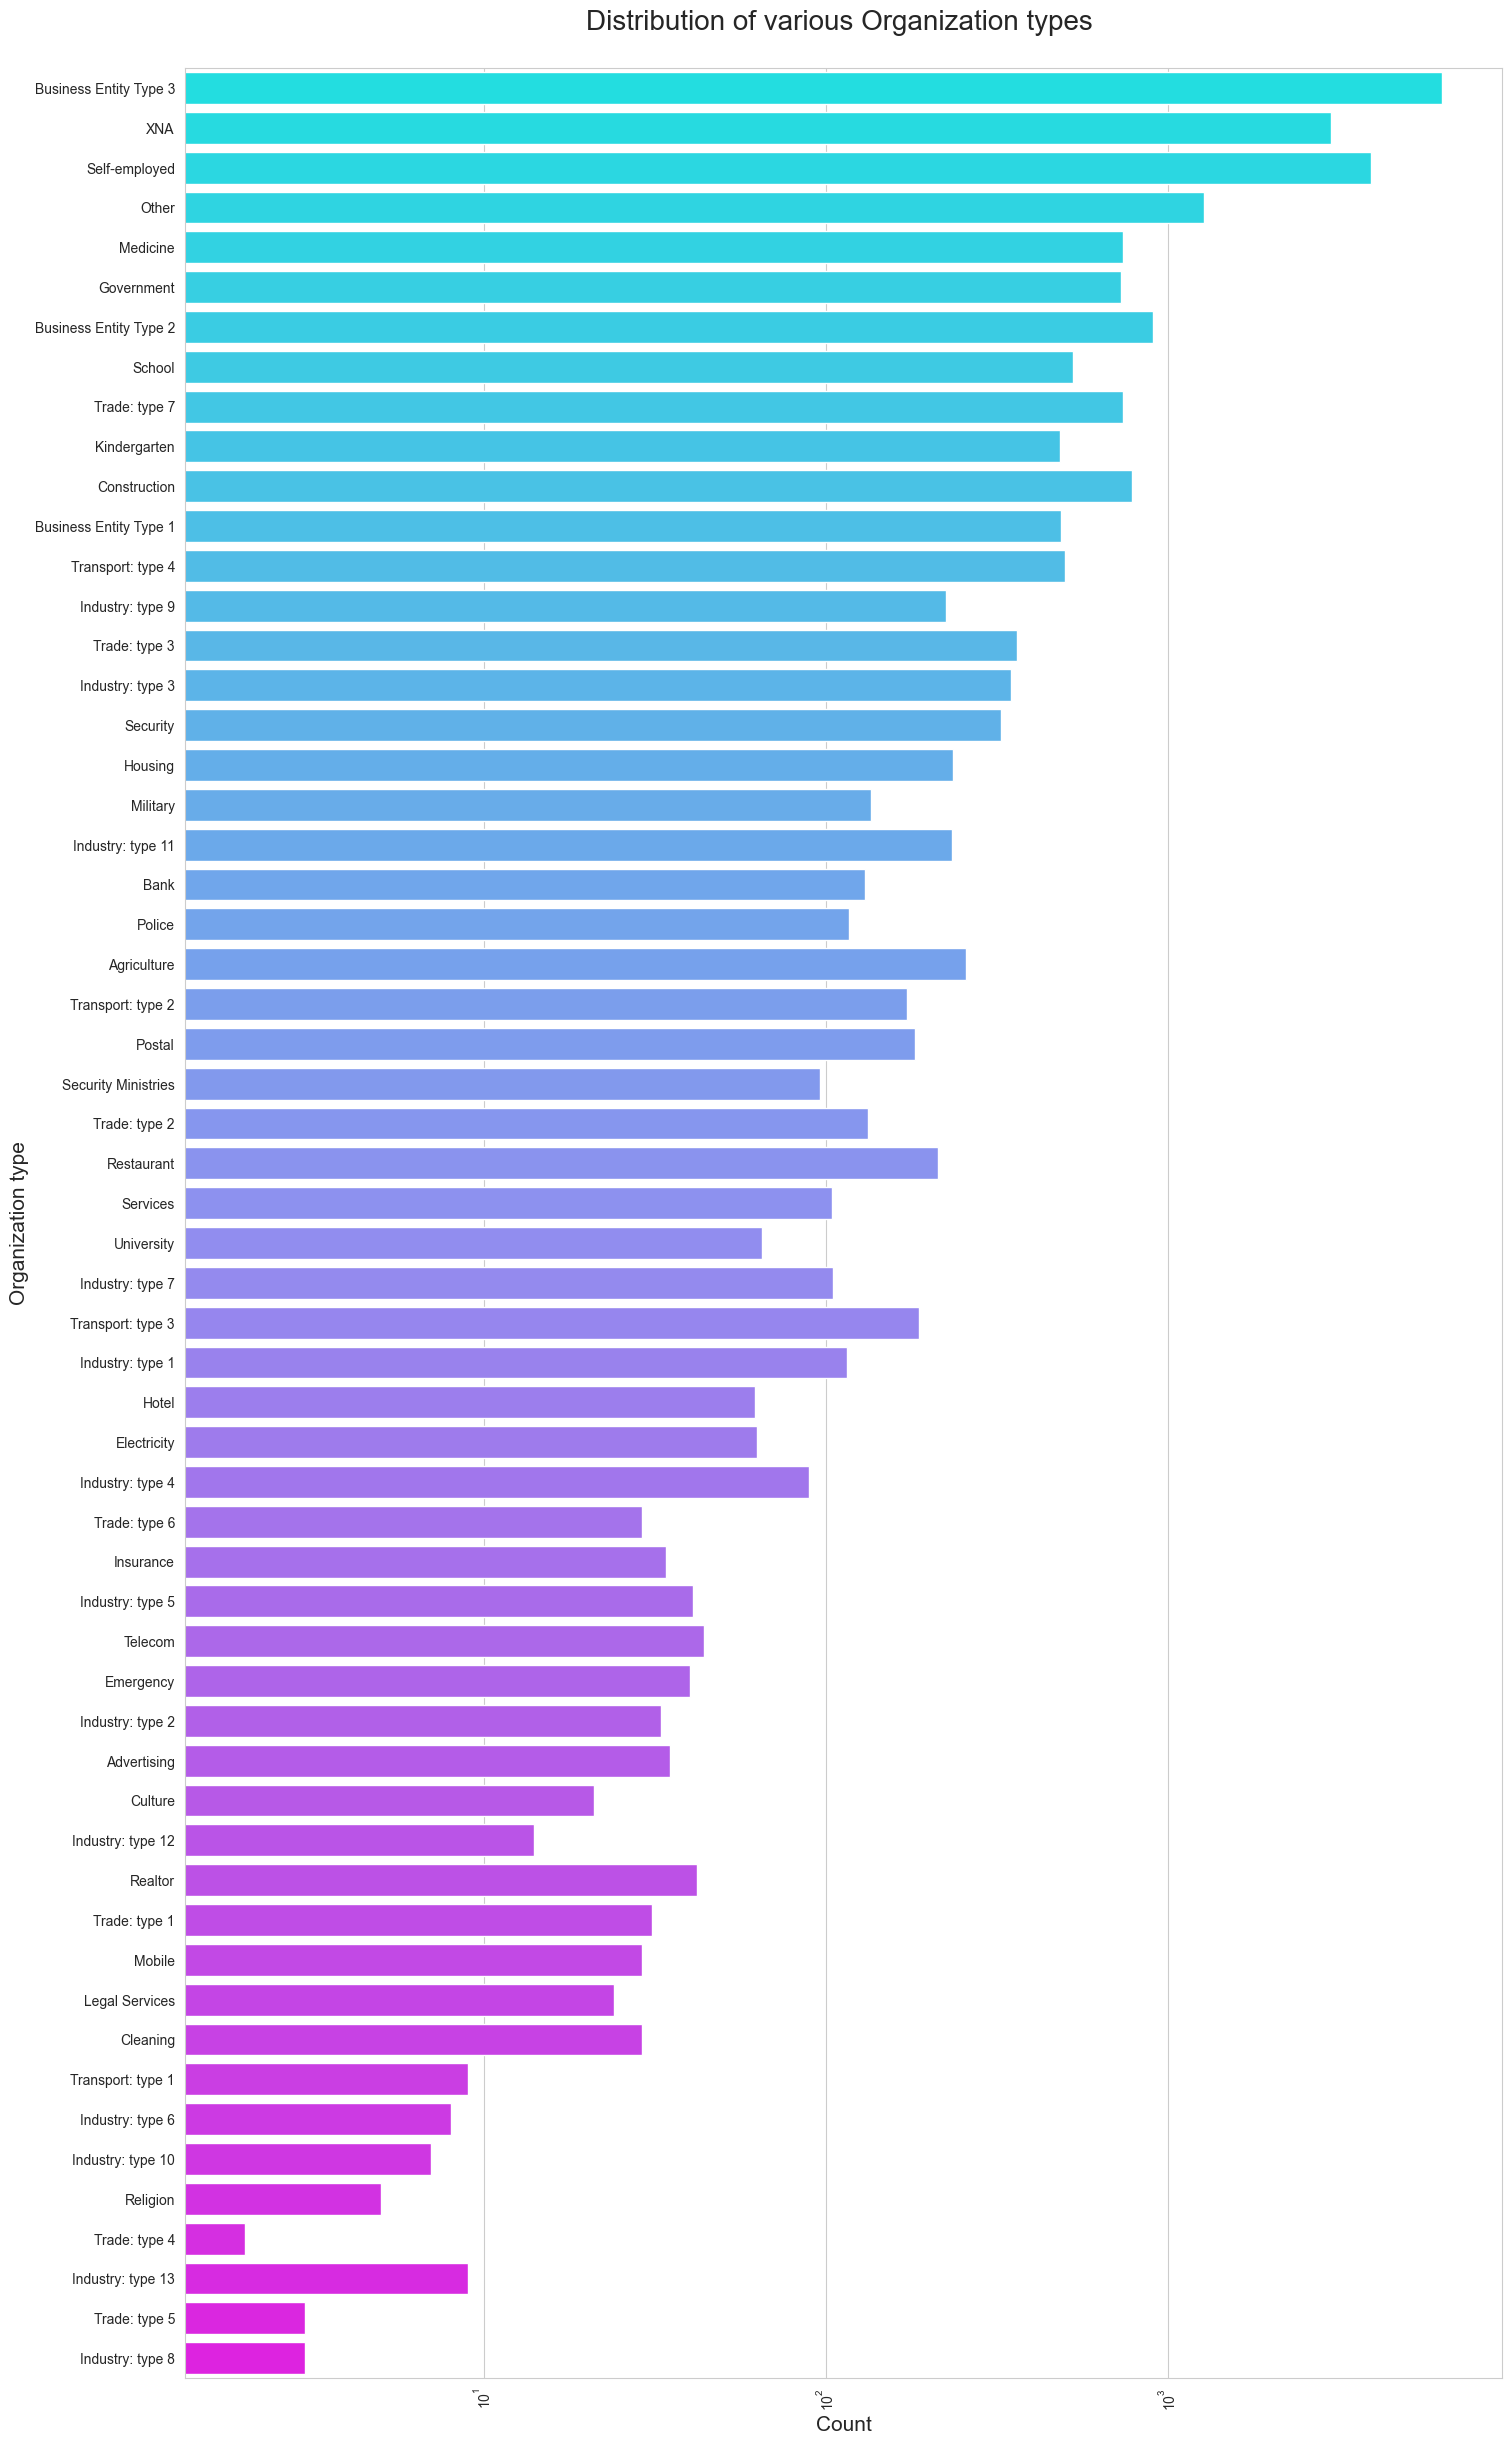

In [18]:
#Plotting for the Organization type across various Genders

plt.figure(figsize=[17,30])

sns.countplot(data=target_1,y='ORGANIZATION_TYPE',order=target_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.title('Distribution of various Organization types \n',fontsize=20)
plt.xlabel('Count',fontsize=15 )
plt.ylabel('Organization type',fontsize=15)
plt.xticks(rotation=90,fontsize=10)
plt.xscale('log')

plt.show()

Conclusions from the graph :
1. Clients which have applied credits are from most of the organization type 'Business entry type 3', 'Self employed', 'Other','Medicine',and 'Government'
2. Less clients are from industry type 8, trade type 5, industry type 13, trade type 4, 
3. Same as type 0 in distribution of organization type

# DEFINING THE CORRELATION 

In [19]:
#Calculating the correlation among target_0 people

target_0_corr = target_0.iloc[0:,2:].corr()
target_0_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_5456\2237296452.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_0_corr = target_0.iloc[0:,2:].corr()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,0.185792,-0.028751,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,0.064937,0.022896,...,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,0.013477,-0.001464,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,0.039436,0.014113,...,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,0.015916,-0.003649,...,0.034093,0.020772,0.032866,-0.013962,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.000648,0.007862,0.004409,0.002392,0.004820,0.001969,0.002772,-0.000802,-0.000035,-0.000198,...,0.013823,0.001341,0.000028,-0.001073,0.229065,1.000000,0.220087,-0.004753,-0.004749,-0.003798
AMT_REQ_CREDIT_BUREAU_WEEK,-0.001632,0.006234,-0.001883,0.012681,-0.001597,-0.002480,-0.001069,0.002304,-0.001431,-0.001655,...,-0.004443,-0.001068,-0.001550,0.000571,0.004576,0.220087,1.000000,-0.014248,-0.015466,0.019085
AMT_REQ_CREDIT_BUREAU_MON,-0.010455,0.061470,0.054071,0.038181,0.055850,0.078629,0.002855,-0.035564,-0.011857,-0.008728,...,-0.002460,-0.002476,0.001379,-0.003246,0.000528,-0.004753,-0.014248,1.000000,-0.008160,-0.004889
AMT_REQ_CREDIT_BUREAU_QRT,-0.007087,0.013128,0.017767,0.011248,0.018163,-0.001013,-0.011335,0.015288,-0.000527,-0.007071,...,-0.005158,-0.001503,-0.001212,-0.002175,-0.003350,-0.004749,-0.015466,-0.008160,1.000000,0.074664


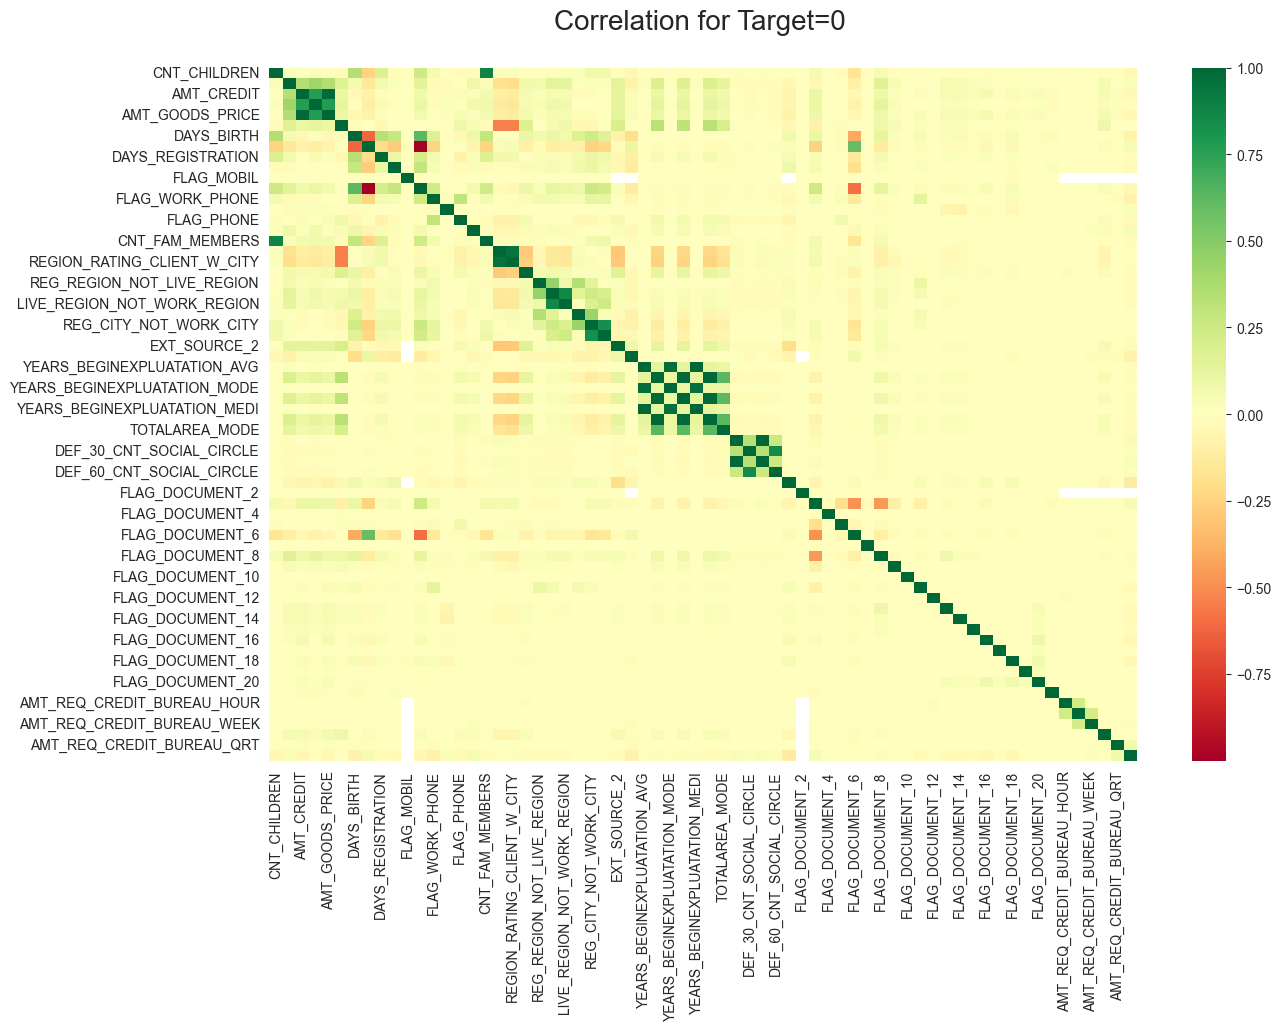

In [20]:
#Plotting the correlation for ther target_0

plt.figure(figsize=[14,9])
sns.heatmap(target_0_corr, annot=False, cmap='RdYlGn')
plt.title('Correlation for Target=0 \n',fontsize= 20)
plt.show()

Conclusions from the graph :
Same like the target=0 heatmap above, adding some other points from this heatmap.
1. The client's permanent address doesn't match contact address are having less children and vice-versa
2. The client's permanent address doesn't match work address are having less children and vice-versa

# FINDING THE TOP 10 CORRELATION FOR TARGET 0 AND TARGET 1

In [21]:
#Fingding the top 10 correlation for target 0

target_0_corr = target_0.iloc[0:,2:].corr()
target_0_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_5456\4046502972.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_0_corr = target_0.iloc[0:,2:].corr()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,0.185792,-0.028751,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,0.064937,0.022896,...,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,0.013477,-0.001464,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,0.039436,0.014113,...,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,0.015916,-0.003649,...,0.034093,0.020772,0.032866,-0.013962,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.000648,0.007862,0.004409,0.002392,0.004820,0.001969,0.002772,-0.000802,-0.000035,-0.000198,...,0.013823,0.001341,0.000028,-0.001073,0.229065,1.000000,0.220087,-0.004753,-0.004749,-0.003798
AMT_REQ_CREDIT_BUREAU_WEEK,-0.001632,0.006234,-0.001883,0.012681,-0.001597,-0.002480,-0.001069,0.002304,-0.001431,-0.001655,...,-0.004443,-0.001068,-0.001550,0.000571,0.004576,0.220087,1.000000,-0.014248,-0.015466,0.019085
AMT_REQ_CREDIT_BUREAU_MON,-0.010455,0.061470,0.054071,0.038181,0.055850,0.078629,0.002855,-0.035564,-0.011857,-0.008728,...,-0.002460,-0.002476,0.001379,-0.003246,0.000528,-0.004753,-0.014248,1.000000,-0.008160,-0.004889
AMT_REQ_CREDIT_BUREAU_QRT,-0.007087,0.013128,0.017767,0.011248,0.018163,-0.001013,-0.011335,0.015288,-0.000527,-0.007071,...,-0.005158,-0.001503,-0.001212,-0.002175,-0.003350,-0.004749,-0.015466,-0.008160,1.000000,0.074664


In [22]:
#Converting the negative values into positive values and sorting the value 

corr_0 = target_0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0

FLAG_DOCUMENT_2           EXT_SOURCE_2                    0.000004
EXT_SOURCE_2              FLAG_DOCUMENT_2                 0.000004
FLAG_MOBIL                FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_12          FLAG_MOBIL                      0.000005
FLAG_DOCUMENT_4           YEARS_BEGINEXPLUATATION_MEDI    0.000008
                                                            ...   
FLOORSMAX_AVG             FLOORSMAX_MEDI                  0.997018
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        0.998508
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE        0.998508
DAYS_EMPLOYED             FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE            DAYS_EMPLOYED                   0.999758
Length: 4258, dtype: float64

In [23]:
#Top 10 correlation target_0

corr_0.tail(10)

FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988153
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997018
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997018
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998508
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999758
dtype: float64

In [24]:
#Fingding the top 10 correlation for target 1

target_1_corr = target_1.iloc[0:,2:].corr()
target_1_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_5456\2995577265.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_1_corr = target_1.iloc[0:,2:].corr()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,0.149154,-0.032299,...,0.004333,-0.001370,-0.002395,0.001136,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,0.000158,-0.004215,...,-0.002177,-0.000371,-0.000450,-0.000647,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,...,0.011174,0.013442,0.016949,-0.021964,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,-0.014303,-0.082552,0.034279,-0.016767,...,-0.034168,-0.001563,-0.001466,-0.029489,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,-0.135810,0.003587,-0.025679,-0.056086,...,0.005541,0.012180,0.016239,-0.019762,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.013004,-0.000272,0.003008,-0.000294,0.004280,-0.005483,-0.007248,0.021363,-0.008367,-0.012654,...,0.005703,-0.001744,-0.001896,-0.001822,0.246741,1.000000,0.184098,-0.012627,0.000789,0.001239
AMT_REQ_CREDIT_BUREAU_WEEK,-0.011792,0.000018,0.007650,0.031242,0.007980,0.002904,-0.005537,0.014720,0.003130,0.003047,...,-0.007416,-0.003964,-0.004310,-0.004141,0.006232,0.184098,1.000000,-0.011994,-0.010151,0.016838
AMT_REQ_CREDIT_BUREAU_MON,-0.012583,0.004114,0.055038,0.053413,0.058558,0.071329,-0.005713,-0.025738,0.004876,-0.014166,...,0.012550,-0.007082,0.000096,-0.007397,-0.007871,-0.012627,-0.011994,1.000000,-0.001365,-0.002559
AMT_REQ_CREDIT_BUREAU_QRT,-0.018174,-0.001133,-0.017467,-0.010205,-0.016024,-0.007299,-0.017214,0.014982,-0.012457,0.007995,...,-0.004834,-0.002809,0.001868,-0.000373,0.006584,0.000789,-0.010151,-0.001365,1.000000,0.101756


In [25]:
#Converting the negative values into positive values and sorting the value 

corr_1 = target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

REGION_RATING_CLIENT         FLAG_DOCUMENT_20               0.000010
FLAG_DOCUMENT_20             REGION_RATING_CLIENT           0.000010
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
                                                              ...   
FLOORSMAX_MEDI               FLOORSMAX_AVG                  0.997187
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999702
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702
Length: 3754, dtype: float64

In [26]:
#Top 10 correlation target_1

corr_1.tail(10)

FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996124
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997187
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997187
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998269
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998269
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999702
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999702
dtype: float64

# BIVARIATE ANALYSIS OF THE NUMERICAL COLUMNS

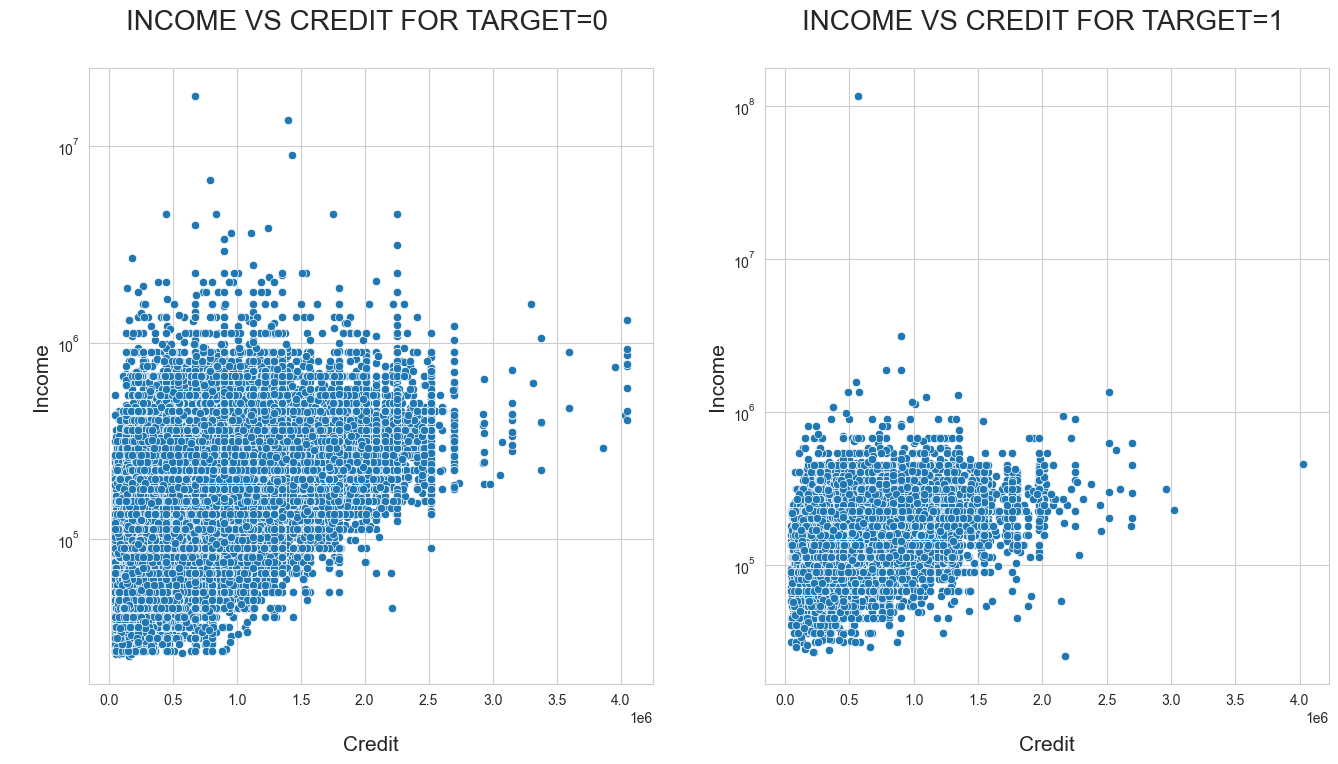

In [27]:
# Plotting scatterplot to find any correlation and to check the trends in the dataset, in logs

plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=target_0)
plt.title('INCOME VS CREDIT FOR TARGET=0 \n',fontsize=20)
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nIncome',fontsize=15)
plt.yscale('log')


plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=target_1)
plt.title('INCOME VS CREDIT FOR TARGET=1 \n',fontsize=20)
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nIncome',fontsize=15)
plt.yscale('log')

plt.show()

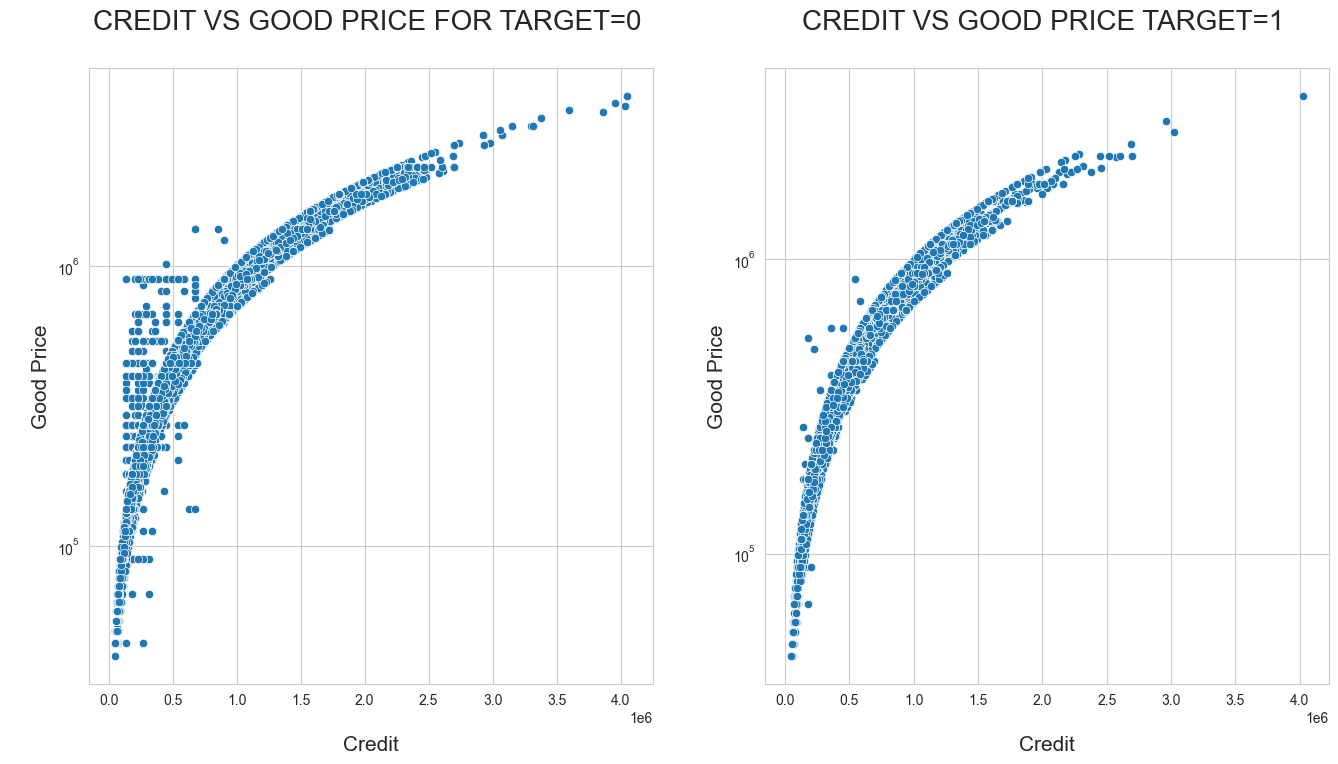

In [28]:
# Plotting scatterplot to find any correlation and to check the trends in the dataset

plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_0)
plt.title('CREDIT VS GOOD PRICE FOR TARGET=0 \n',fontsize=20)
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nGood Price',fontsize=15)
plt.yscale('log')


plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_1)
plt.title('CREDIT VS GOOD PRICE TARGET=1 \n',fontsize=20)
plt.xlabel('\nCredit',fontsize=15)
plt.ylabel('\nGood Price',fontsize=15)
plt.yscale('log')

plt.show()

Conculusions from the graphs :
With the scatter plot, we can determine that AMT CREDIT and AMT GOODS PRICE are highly correlated, which means if increase in good price the credit increased directly 

FINDING OUTLIERS

Univariate Analysis 

For Target 0

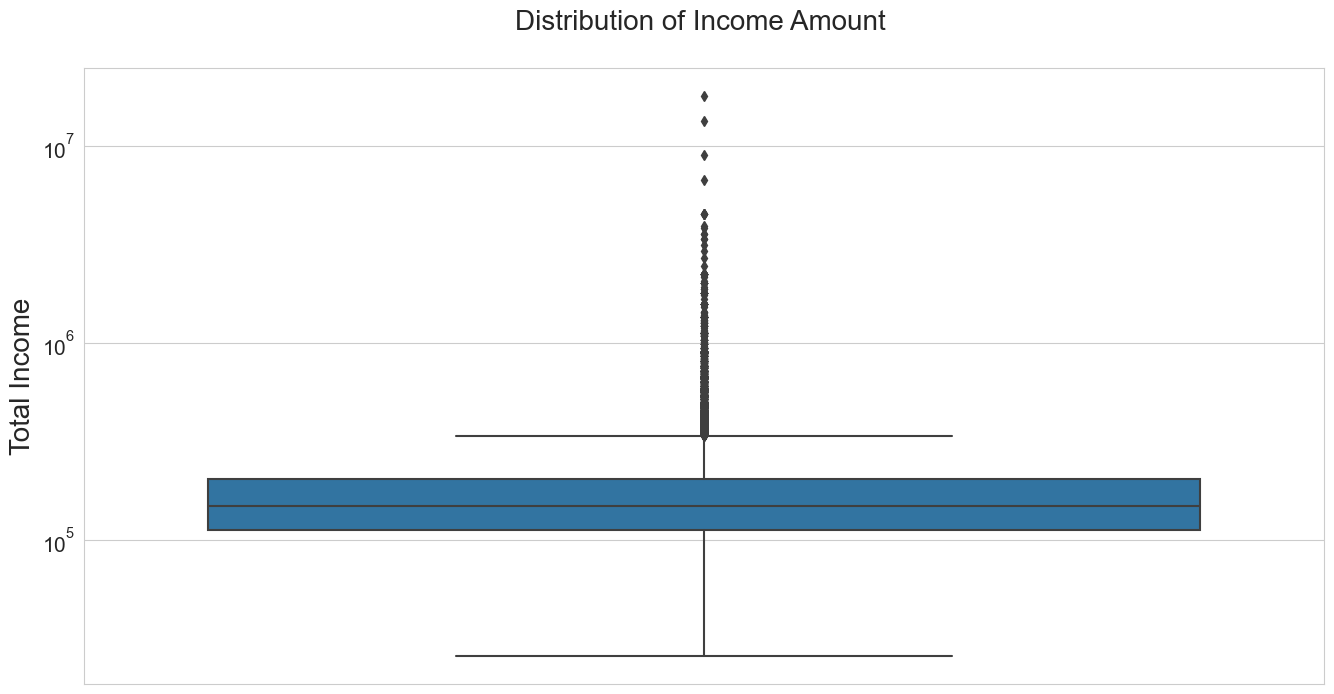

In [29]:
#Distribution of Income Amount 
plt.figure(figsize=[16,8])
sns.set_style('whitegrid')

sns.boxplot(y='AMT_INCOME_TOTAL',data=target_0)
plt.title('Distribution of Income Amount \n',fontsize=20)
plt.ylabel('Total Income',fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)

plt.show()

Conclusions of the graph :
1. There seems to be an equal distribution of the Income amount of the credits 
2. Also some of the outliers presents in the dataset

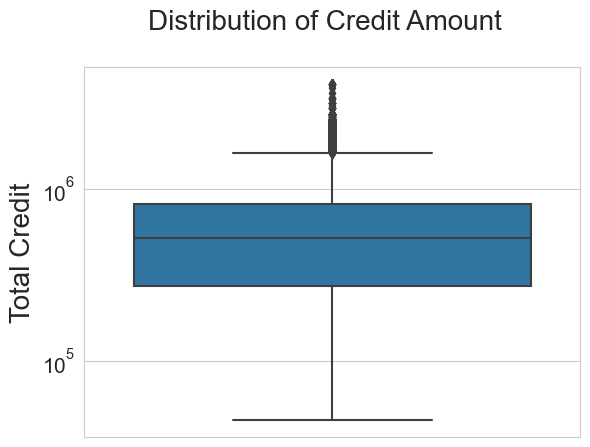

In [30]:
#Distribution of Credit Amount 

sns.set_style('whitegrid')

sns.boxplot(y='AMT_CREDIT',data=target_0)
plt.title('Distribution of Credit Amount  \n',fontsize=20)
plt.ylabel('Total Credit',fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)

plt.show()

Conclusions from the graph :
1. The first quartile is bigger than the third quartile, than means most the client credit lies in the first quartile
2. There seems some outliers in the Credit boxplot

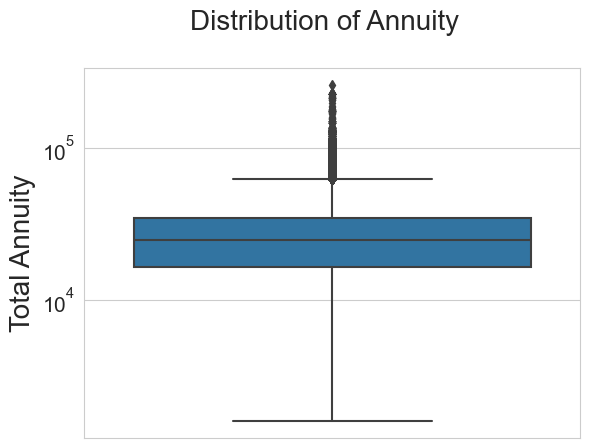

In [31]:
#Distribution of Annuity 

sns.set_style('whitegrid')

sns.boxplot(y='AMT_ANNUITY',data=target_0)
plt.title('Distribution of Annuity  \n',fontsize=20)
plt.ylabel('Total Annuity',fontsize=20)
plt.yscale('log')
plt.yticks(fontsize=15)

plt.show()

Conclusions of the graph :
1. The first quartile is bigger than the third quartile
2. There seems some outliers in the Annuity boxplot

# MULTIVARIATE ANALYSIS

Target 0 

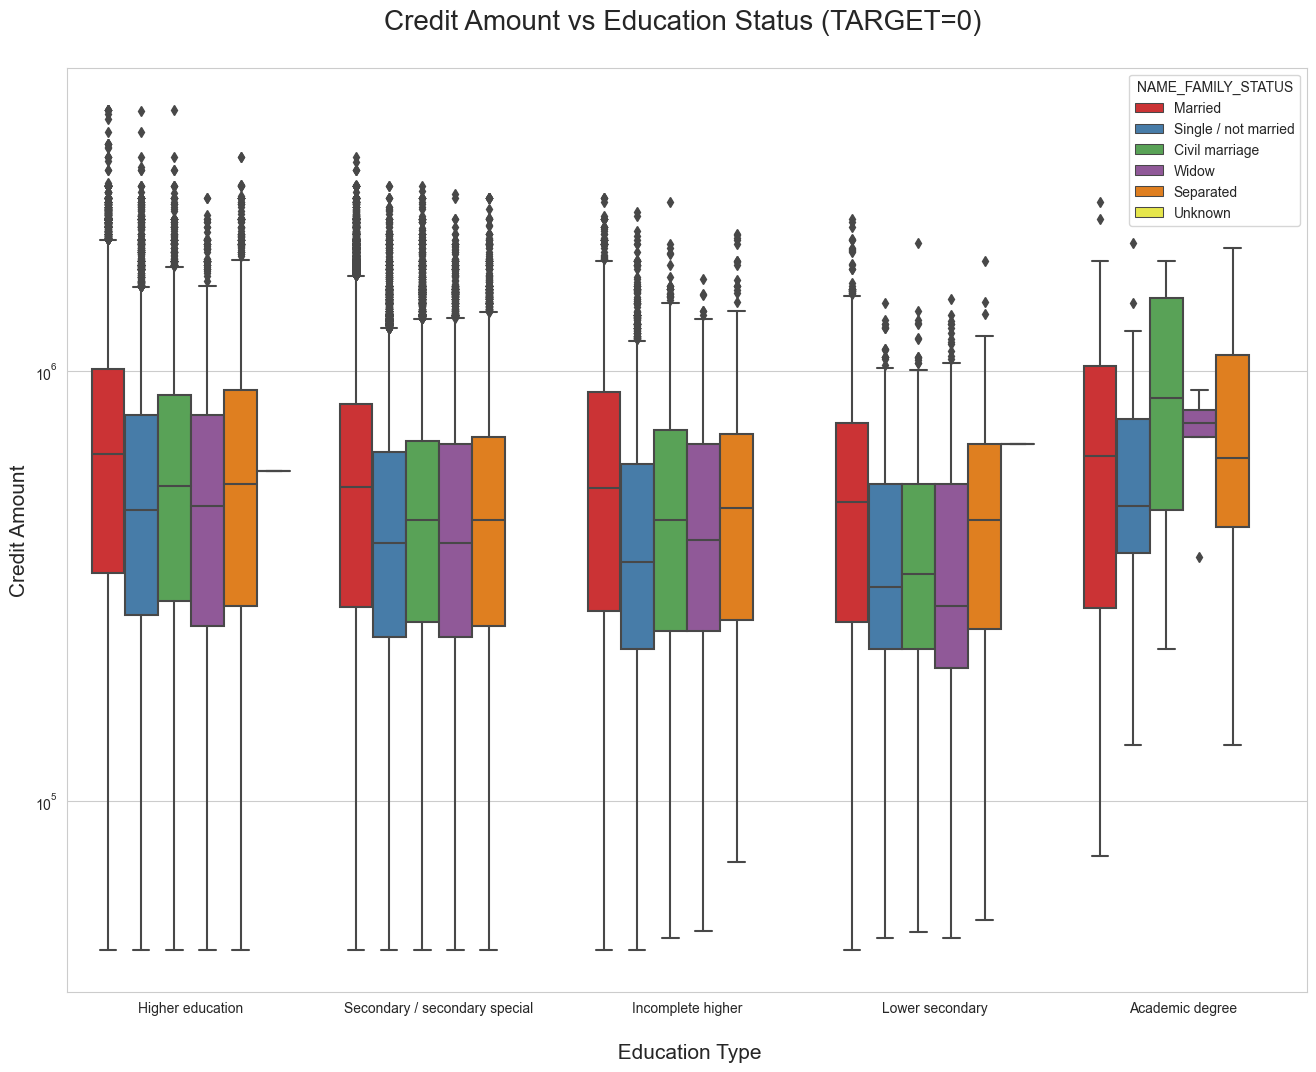

In [32]:
#Box Plotting for the target =0, Credit Amount 

plt.figure(figsize=[16,12])

sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v',palette='Set1',data=target_0)
plt.title('Credit Amount vs Education Status (TARGET=0) \n',fontsize=20)
plt.xlabel('\n Education Type',fontsize=15)
plt.ylabel('Credit Amount',fontsize=15)
plt.yscale('log')
plt.xticks(rotation=0)

plt.show()

Conclusions from the graph :
    From the above box plot we can conclude that Family status of 'civil marriage' and 'separeted'of 'Academic' degree education are having higher number of credits than others. Also, higher education of family status of 'mariage', 'single' and 'civil mariage' are having more outliers. Civil mariage for Academic degree is having most of the credits in the third quartile
   

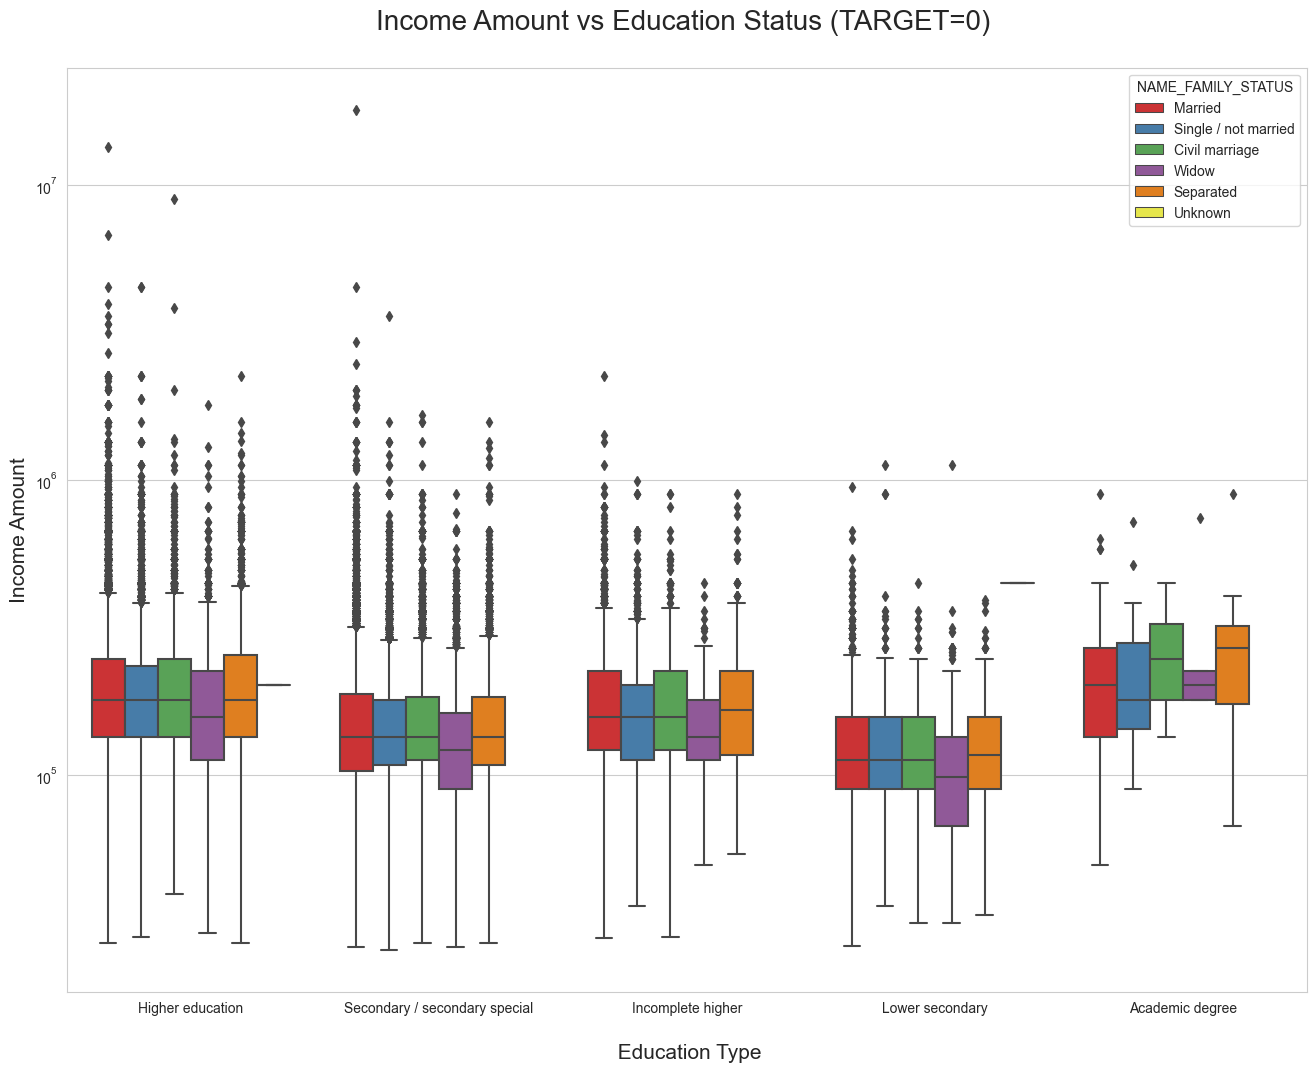

In [33]:
#Box Plotting for the target =0, Income Amount 

plt.figure(figsize=[16,12])

sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v',palette='Set1',data=target_0)
plt.title('Income Amount vs Education Status (TARGET=0) \n',fontsize=20)
plt.xlabel('\n Education Type',fontsize=15)
plt.ylabel('Income Amount',fontsize=15)
plt.yscale('log')
plt.xticks(rotation=0)

plt.show()

Conclusions from the graph :

    From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are are having for Academic degree but there income amount is little higher than Higher education. Lower secondary of civil mariage family status are have less income amount than others
   

Target 1

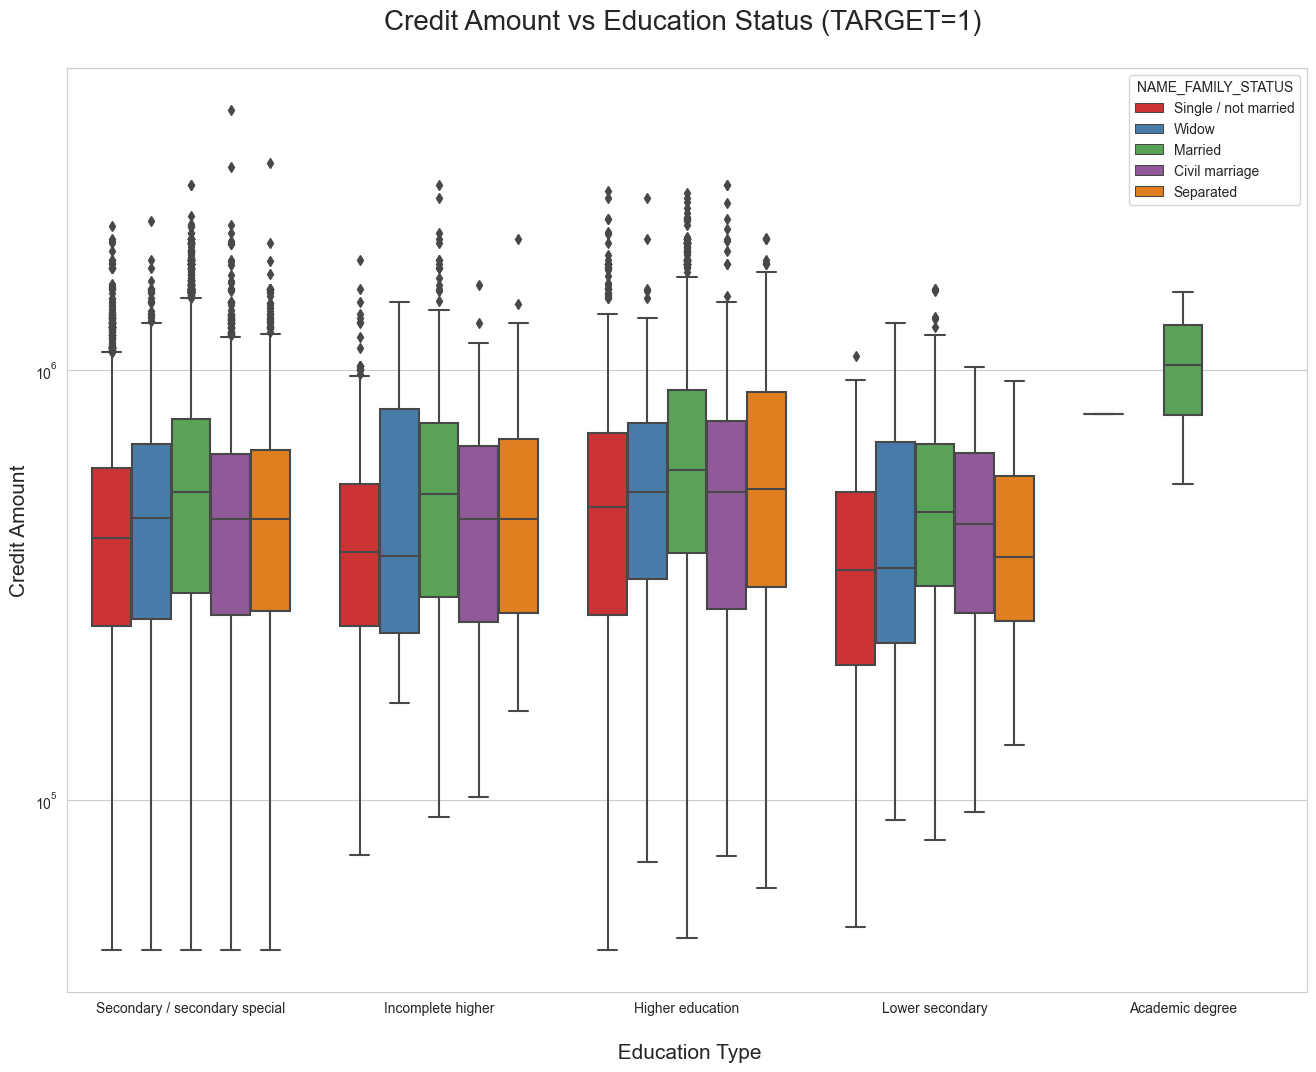

In [34]:
#Box Plotting for the target =1, Credit Amount 

plt.figure(figsize=[16,12])

sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',orient='v',palette='Set1',data=target_1)
plt.title('Credit Amount vs Education Status (TARGET=1) \n',fontsize=20)
plt.xlabel('\n Education Type',fontsize=15)
plt.ylabel('Credit Amount',fontsize=15)
plt.yscale('log')
plt.xticks(rotation=0)

plt.show()

Conclusions from the graph :
    
    From above boxplot we can say that Family status of 'civil mariage' and 'separeted' of Academic degree education are having higher number of credits than others. Most of the outliers are from education type 'Higher education' and 'Secondary'. Civil mariage for Academic degree is having most of the credits in the third quartille 

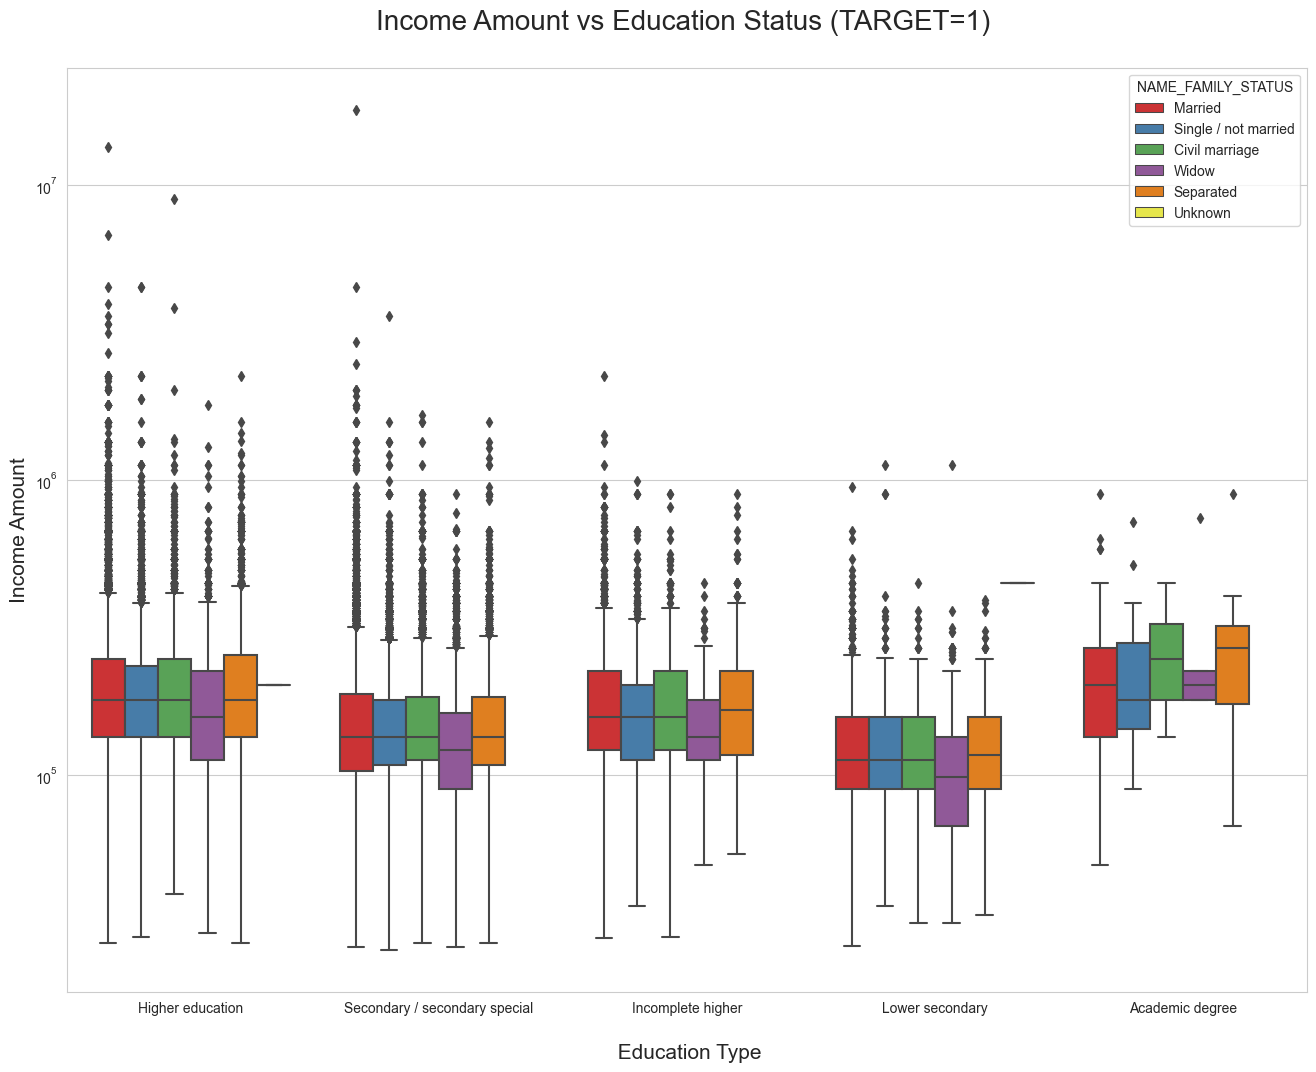

In [35]:
#Box Plotting for the target =1, Income Amount 

plt.figure(figsize=[16,12])

sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v',palette='Set1',data=target_0)
plt.title('Income Amount vs Education Status (TARGET=1) \n',fontsize=20)
plt.xlabel('\n Education Type',fontsize=15)
plt.ylabel('Income Amount',fontsize=15)
plt.yscale('log')
plt.xticks(rotation=0)

plt.show()

Conclusions from the graph :
    
    From above boxplot Education type 'Higher education' the income amount is mostly equal with family status. Less outliner are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others 

# CONCLUSIONS OF THIS LOAN ANALYSIS:
Home Credit should provide loans to 'Repairs' and 'Other' purposes

Home Credit should provide loans to 'Business entry type 3' and 'Self employed' persons

'Working' people especially woman employers are the best to target for the loans

In [36]:
app_train.to_csv("df_preprocessing.csv")

In [37]:
df = pd.read_csv('df_preprocessing.csv')
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA SPLITTING

In [41]:
#Membagi data menjadi 80% train dan 20% test set
x = df.drop('TARGET',axis=1)
y = df['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [42]:
x_train.shape, x_test.shape

((246008, 81), (61503, 81))

In [44]:
y_train.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [46]:
y_test.value_counts(normalize=True)

0    0.919272
1    0.080728
Name: TARGET, dtype: float64

# DATA CLEANING

In [47]:
for col in x_train.select_dtypes(include=['object','bool']).columns:
    print(col)
    print(x_train[col].unique())
    print()


NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['F' 'M' 'XNA']

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['N' 'Y']

NAME_TYPE_SUITE
['Unaccompanied' 'Spouse, partner' 'Family' 'Other_B' nan 'Children'
 'Group of people' 'Other_A']

NAME_INCOME_TYPE
['Commercial associate' 'Working' 'Pensioner' 'State servant'
 'Businessman' 'Unemployed' 'Student' 'Maternity leave']

NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow'
 'Unknown']

NAME_HOUSING_TYPE
['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Co-op apartment' 'Office apartment']

OCCUPATION_TYPE
['Laborers' 'Drivers' 'Accountants' nan 'Sales staff'
 'High skill tech staff' 'Medicine staff' 'Core staff' 'Security staff'
 'Managers' 'Waiters/barmen staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'IT st

# FEATURE ENGINEERING 

In [49]:
col_clean = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN','DAYS_REGISTRATION','DAYS_ID_PUBLISH','Trans_ContractType','Trans_CodeGender','Trans_OwnCar','Trans_OwnReality','Trans_WeekdayAppr']

In [50]:
def tran_contract_type(x):
    if x == 'Cash loans':
        return 0
    if x == 'Revolving loans':
        return 1 
    
x_train['Trans_ContractType'] = x_train['NAME_CONTRACT_TYPE'].apply(tran_contract_type) 

def tran_code_gender(x):
    if x == 'F':
        return 0
    if x == 'M':
        return 1 
    
x_train['Trans_CodeGender'] = x_train['CODE_GENDER'].apply(tran_code_gender) 


def tran_own_car(x):
    if x == 'Y':
        return 0
    if x == 'N':
        return 1 
    
x_train['Trans_OwnCar'] = x_train['FLAG_OWN_CAR'].apply(tran_own_car) 

def tran_own_reality(x):
    if x == 'Y':
        return 0
    if x == 'N':
        return 1 
    
x_train['Trans_OwnReality'] = x_train['FLAG_OWN_REALTY'].apply(tran_own_reality)

def tran_weekday_appr(x):
    if x == 'SUNDAY':
        return 0
    if x == 'MONDAY':
        return 1 
    if x == 'TUESDAY':
        return 2 
    if x == 'WEDNESDAY':
        return 3 
    if x == 'THURSDAY':
        return 4 
    if x == 'FRIDAY':
        return 5 
    if x == 'SATURDAY':
        return 6 

x_train['Trans_WeekdayAppr'] = x_train['WEEKDAY_APPR_PROCESS_START'].apply(tran_weekday_appr)



In [51]:
x_train[col_clean]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,DAYS_REGISTRATION,DAYS_ID_PUBLISH,Trans_ContractType,Trans_CodeGender,Trans_OwnCar,Trans_OwnReality,Trans_WeekdayAppr
181648,90000.0,227520.0,13189.5,180000.0,2,-6378.0,-4670,0,0.0,1,1,3
229245,90000.0,161730.0,13095.0,135000.0,0,-1292.0,-1994,0,1.0,0,0,2
122525,135000.0,728847.0,26307.0,553500.0,0,-7951.0,-2842,0,1.0,1,0,2
306311,135000.0,474183.0,34636.5,391500.0,0,-1033.0,-1345,0,1.0,1,1,2
300658,180000.0,254700.0,27558.0,225000.0,0,-2873.0,-852,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31304,135000.0,405000.0,20250.0,405000.0,1,-6831.0,-4420,1,0.0,1,0,1
121193,157500.0,272520.0,21528.0,225000.0,0,-8490.0,-2561,0,0.0,1,1,1
248504,90000.0,246357.0,24493.5,234000.0,0,-8975.0,-4636,0,0.0,1,1,0
175469,112500.0,810000.0,26901.0,810000.0,0,-10162.0,-4636,0,0.0,1,0,3


In [52]:
def tran_contract_type(x):
    if x == 'Cash loans':
        return 0
    if x == 'Revolving loans':
        return 1 
    
x_test['Trans_ContractType'] = x_test['NAME_CONTRACT_TYPE'].apply(tran_contract_type) 

def tran_code_gender(x):
    if x == 'F':
        return 0
    if x == 'M':
        return 1 
    
x_test['Trans_CodeGender'] = x_test['CODE_GENDER'].apply(tran_code_gender) 


def tran_own_car(x):
    if x == 'Y':
        return 0
    if x == 'N':
        return 1 
    
x_test['Trans_OwnCar'] = x_test['FLAG_OWN_CAR'].apply(tran_own_car) 

def tran_own_reality(x):
    if x == 'Y':
        return 0
    if x == 'N':
        return 1 
    
x_test['Trans_OwnReality'] = x_test['FLAG_OWN_REALTY'].apply(tran_own_reality)

def tran_weekday_appr(x):
    if x == 'SUNDAY':
        return 0
    if x == 'MONDAY':
        return 1 
    if x == 'TUESDAY':
        return 2 
    if x == 'WEDNESDAY':
        return 3 
    if x == 'THURSDAY':
        return 4 
    if x == 'FRIDAY':
        return 5 
    if x == 'SATURDAY':
        return 6 

x_test['Trans_WeekdayAppr'] = x_test['WEEKDAY_APPR_PROCESS_START'].apply(tran_weekday_appr)


In [53]:
x_test[col_clean]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,DAYS_REGISTRATION,DAYS_ID_PUBLISH,Trans_ContractType,Trans_CodeGender,Trans_OwnCar,Trans_OwnReality,Trans_WeekdayAppr
256571,157500.0,770292.0,30676.5,688500.0,1,-2876.0,-4402,0,1.0,0,0,1
191493,90000.0,364896.0,19926.0,315000.0,0,-4654.0,-1259,0,0.0,1,1,4
103497,148500.0,284400.0,18643.5,225000.0,0,-12511.0,-2474,0,1.0,1,0,4
130646,188100.0,976711.5,38218.5,873000.0,0,-969.0,-2289,0,0.0,1,1,4
211898,180000.0,323194.5,19660.5,279000.0,0,-10063.0,-1040,0,0.0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,162000.0,834048.0,27693.0,720000.0,0,-7631.0,-3949,0,0.0,1,0,3
294620,180000.0,1305000.0,38155.5,1305000.0,0,-10377.0,-1325,0,1.0,0,0,6
234384,360000.0,239850.0,27058.5,225000.0,1,-7353.0,-2815,0,0.0,0,0,6
149027,337500.0,900000.0,45954.0,900000.0,0,-1312.0,-3991,0,1.0,0,0,5


In [54]:
x_train[col_clean].info()
x_test[col_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 181648 to 285162
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AMT_INCOME_TOTAL    246008 non-null  float64
 1   AMT_CREDIT          246008 non-null  float64
 2   AMT_ANNUITY         245998 non-null  float64
 3   AMT_GOODS_PRICE     245787 non-null  float64
 4   CNT_CHILDREN        246008 non-null  int64  
 5   DAYS_REGISTRATION   246008 non-null  float64
 6   DAYS_ID_PUBLISH     246008 non-null  int64  
 7   Trans_ContractType  246008 non-null  int64  
 8   Trans_CodeGender    246006 non-null  float64
 9   Trans_OwnCar        246008 non-null  int64  
 10  Trans_OwnReality    246008 non-null  int64  
 11  Trans_WeekdayAppr   246008 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 24.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61503 entries, 256571 to 268861
Data columns (total 12 columns):
 #   Column       

In [55]:
x_train = x_train[col_clean]
x_test = x_test[col_clean]

In [80]:
x_train.isnull().sum()

AMT_INCOME_TOTAL      23564
AMT_CREDIT            15709
AMT_ANNUITY           11782
AMT_GOODS_PRICE        9425
CNT_CHILDREN           7854
DAYS_REGISTRATION      6732
DAYS_ID_PUBLISH        5891
Trans_ContractType     5236
Trans_CodeGender       4712
Trans_OwnCar           4284
Trans_OwnReality       3927
Trans_WeekdayAppr      3625
dtype: int64

In [81]:
x_train.fillna(x_train.median(),inplace=True)
x_test.fillna(x_test.median(),inplace=True)

In [82]:
x_train.isnull().sum()

AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
CNT_CHILDREN          0
DAYS_REGISTRATION     0
DAYS_ID_PUBLISH       0
Trans_ContractType    0
Trans_CodeGender      0
Trans_OwnCar          0
Trans_OwnReality      0
Trans_WeekdayAppr     0
dtype: int64

In [83]:
x_test.isnull().sum()

AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
CNT_CHILDREN          0
DAYS_REGISTRATION     0
DAYS_ID_PUBLISH       0
Trans_ContractType    0
Trans_CodeGender      0
Trans_OwnCar          0
Trans_OwnReality      0
Trans_WeekdayAppr     0
dtype: int64

# MODELLING

In [85]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((47129, 12), (246008,), (61442, 12), (61503,))

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()

In [88]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

ValueError: Found input variables with inconsistent numbers of samples: [47129, 246008]